In [76]:
import json, os

### Upload datasets from private API (remove)

In [77]:
# AIXÒ FER-HO PRIVAT , de moment esta aixi per estalviar uploadear els datasets cada cop

data = {
    "username":"albertroca29",
    "key":"abb86cea6e8b29e5a3002793d9210162"
}
with open("kaggle.json", "w") as f:
    json.dump(data, f)

os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d albertroca29/arlsgqrms/UH_2023_TRAIN.txt

 59% 24.0M/40.8M [00:00<00:00, 128MB/s] 
100% 40.8M/40.8M [00:00<00:00, 149MB/s]


### Unzip the zip file to have the datasets 

In [78]:
!unzip \*.zip  && rm *.zip

Archive:  arlsgqrms.zip
replace DATOS_ETO.TXT? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DATOS_METEO.TXT? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace UH_2023_TRAIN.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Pandas dataset

In [79]:
import pandas as pd

def load_dataset(path): 
    dataset = pd.read_csv(path, header=0, delimiter='|')
    return dataset

train = load_dataset('UH_2023_TRAIN.txt')
meteo = load_dataset('DATOS_METEO.TXT')
eto = load_dataset('DATOS_ETO.TXT')

df = {'train':train,'meteo':meteo,'eto':eto}

Dimensions

In [80]:
_=[print(nom,'\t',dataset.shape) for nom,dataset in df.items()]

train 	 (9601, 11)
meteo 	 (1223660, 33)
eto 	 (51180, 275)


In [81]:
_=[print(nom,'\t',dataset.columns) for nom,dataset in df.items()]

train 	 Index(['CAMPAÑA', 'ID_FINCA', 'ID_ZONA', 'ID_ESTACION', 'ALTITUD', 'VARIEDAD',
       'MODO', 'TIPO', 'COLOR', 'SUPERFICIE', 'PRODUCCION'],
      dtype='object')
meteo 	 Index(['validTimeUtc', 'precip1Hour', 'precip6Hour', 'precip24Hour',
       'precip2Day', 'precip3Day', 'precip7Day', 'precipMtd', 'precipYtd',
       'pressureChange', 'pressureMeanSeaLevel', 'relativeHumidity',
       'snow1Hour', 'snow6Hour', 'snow24Hour', 'snow2Day', 'snow3Day',
       'snow7Day', 'snowMtd', 'snowSeason', 'snowYtd', 'temperature',
       'temperatureChange24Hour', 'temperatureMax24Hour',
       'temperatureMin24Hour', 'temperatureDewPoint', 'temperatureFeelsLike',
       'uvIndex', 'visibility', 'windDirection', 'windGust', 'windSpeed',
       'ID_ESTACION'],
      dtype='object')
eto 	 Index(['date', 'DewpointLocalAfternoonAvg', 'DewpointLocalAfternoonMax',
       'DewpointLocalAfternoonMin', 'DewpointLocalDayAvg',
       'DewpointLocalDayMax', 'DewpointLocalDayMin', 'DewpointLocalDaytimeA

NaNs en train

In [82]:
train.isnull().sum()

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       0
ALTITUD          54
VARIEDAD          0
MODO              0
TIPO              0
COLOR             0
SUPERFICIE        0
PRODUCCION     1075
dtype: int64

### Relacio entre dades no meteo

In [83]:
train.isnull().sum()
t2 = train[~train.ALTITUD.isnull()]
t2 = t2[~t2.PRODUCCION.isnull()]
print(t2.isnull().sum())

CAMPAÑA        0
ID_FINCA       0
ID_ZONA        0
ID_ESTACION    0
ALTITUD        0
VARIEDAD       0
MODO           0
TIPO           0
COLOR          0
SUPERFICIE     0
PRODUCCION     0
dtype: int64


In [84]:
train.dtypes

CAMPAÑA          int64
ID_FINCA         int64
ID_ZONA          int64
ID_ESTACION      int64
ALTITUD         object
VARIEDAD         int64
MODO             int64
TIPO             int64
COLOR            int64
SUPERFICIE     float64
PRODUCCION     float64
dtype: object

In [85]:
for i in range(t2.shape[0]):
    valor = t2['ALTITUD'].values[i]
    if(len(valor)>3):
        t2['ALTITUD'].values[i] = int((int(valor[:3])+int(valor[-3:]))/2)
    else:
        t2['ALTITUD'].values[i] = int(valor)

t2['ALTITUD'] = pd.to_numeric(t2['ALTITUD'])

655


<AxesSubplot:>

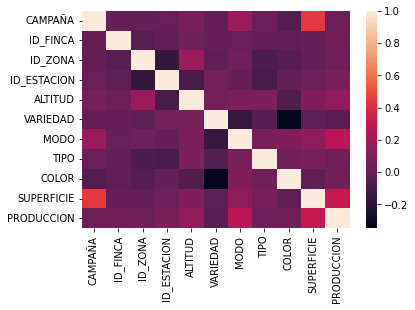

In [86]:
import seaborn as sns

sns.heatmap(t2.corr())

In [87]:
eto.head()

,date,DewpointLocalAfternoonAvg,DewpointLocalAfternoonMax,DewpointLocalAfternoonMin,DewpointLocalDayAvg,DewpointLocalDayMax,DewpointLocalDayMin,DewpointLocalDaytimeAvg,DewpointLocalDaytimeMax,DewpointLocalDaytimeMin,...,WindSpeedLocalMorningAvg,WindSpeedLocalMorningMax,WindSpeedLocalMorningMin,WindSpeedLocalNighttimeAvg,WindSpeedLocalNighttimeMax,WindSpeedLocalNighttimeMin,WindSpeedLocalOvernightAvg,WindSpeedLocalOvernightMax,WindSpeedLocalOvernightMin,ID_ESTACION
0,20150629,285.9,285.9,285.9,286.0,287.0,285.4,285.9,285.9,285.9,...,NaN,NaN,NaN,2.6,5.0,1.1,1.7,2.1,1.1,13
1,20150630,283.0,283.6,282.5,284.3,286.5,282.5,283.2,283.9,282.5,...,2.2,3.8,1.4,2.7,5.2,1.4,1.5,1.9,1.4,13
2,20150701,286.1,286.5,285.5,285.8,288.0,283.8,285.4,286.5,283.8,...,2.7,4.3,1.2,3.0,5.7,1.4,1.9,2.8,1.4,13
3,20150702,288.9,289.4,287.9,288.3,291.8,286.1,287.7,289.4,286.1,...,1.7,2.3,1.2,3.6,5.4,2.4,2.7,3.4,2.4,13
4,20150703,289.1,290.4,288.5,290.5,293.0,287.8,290.6,293.0,288.5,...,3.5,5.0,2.3,3.1,6.0,1.5,1.9,2.2,1.5,13
